In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
sns.set_style("whitegrid")
nltk.download('stopwords')
plt.rcParams["figure.figsize"] = (15,10)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fadhinotgr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### get the data

In [3]:
df_damri = pd.read_csv("../data/damri_apps_raw.csv")
df_damri = df_damri[["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_damri.shape

(4934, 7)

### random select data

In [135]:
# random_select
np.random.choice(df_damri['content'], size=10, replace=False)

array(['Baru mau regist aja kesulitan , saya tidak menerima kode verifikasi yg dikirim ke email ,bagaimana solusinya ?',
       'siupp',
       'GA JELAS BANGET APLIKASINYA LIAT JADWAL GA BISA, DAFTAR JUGA GA BISA TRS MAUNYA GIMANAA',
       'Aplikasi loading melulu', 'oke',
       'Kinerja aplikasinya semakin TOP! semakin terbantu. Makasih damri apps.',
       'baru instal, buat pesen tiket cari nya lokasi nunggu lama banget trus gak bisa. sudah coba contohnya ganti tanggalnya gak ada keberangkatan makaudnya gimana ini. Tolong perbaiki lagi aplikasinya.',
       'On time untuk keberangkatan, mantabzz',
       'Parah.....parah....parah....baru daftar sj sudah ada kendala ...email verifikasi tdk masuk2 walau sdh di ulang kirim ttp sama ....LAMA .....',
       'Tidak lengkap untuk lokasi daerah'], dtype=object)

In [136]:
df_damri.head()

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gabisa beli tiket jir,1,0,4.5.2,2025-09-04 11:13:20,NaN,NaN
1,"good banget,simple dengan pemesanan tiket via ...",5,0,4.5.2,2025-09-03 06:31:04,NaN,NaN
2,mau ngecek ongkir kirim paket ga tersedia.. pa...,1,0,4.5.2,2025-09-02 17:06:03,NaN,NaN
3,nyaman banget naik bus damri dari jagakarsa ke...,5,0,4.5.1,2025-09-02 07:13:14,NaN,NaN
4,ini kenapa nik saya gk bisa buat daftar,3,0,NaN,2025-08-31 07:00:03,NaN,NaN


### Remove Emoji

In [137]:
import re

def remove_emoji(text: str) -> str:
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)
df_damri['cleaned_text'] = df_damri['content'].apply(remove_emoji)

### Punctuation Removal

In [138]:
import re

def remove_punctuation(text:str) -> str:
    return re.sub(r'[^[^\w\s]', '', text)

In [139]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(remove_punctuation)

### Lowering

In [140]:
def to_lowercase(text: str) -> str:
    return text.lower()
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(to_lowercase)

### Tokenizations & EDA for Raw Data

In [141]:
df_damri['tokenized_raw_text'] = df_damri['cleaned_text'].apply(word_tokenize)

In [143]:
# Collect all tokens in a single list
all_tokens = [token for tokens in df_damri['tokenized_raw_text'] for token in tokens]

In [144]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

token_counts = Counter(all_tokens)

df = pd.DataFrame(list(token_counts.items()), columns=['Word', 'Frequency'])
df = df.sort_values('Frequency', ascending=False).head(15)

/tmp/ipykernel_19685/146683250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Frequency', y='Word', ax=ax, palette='viridis')


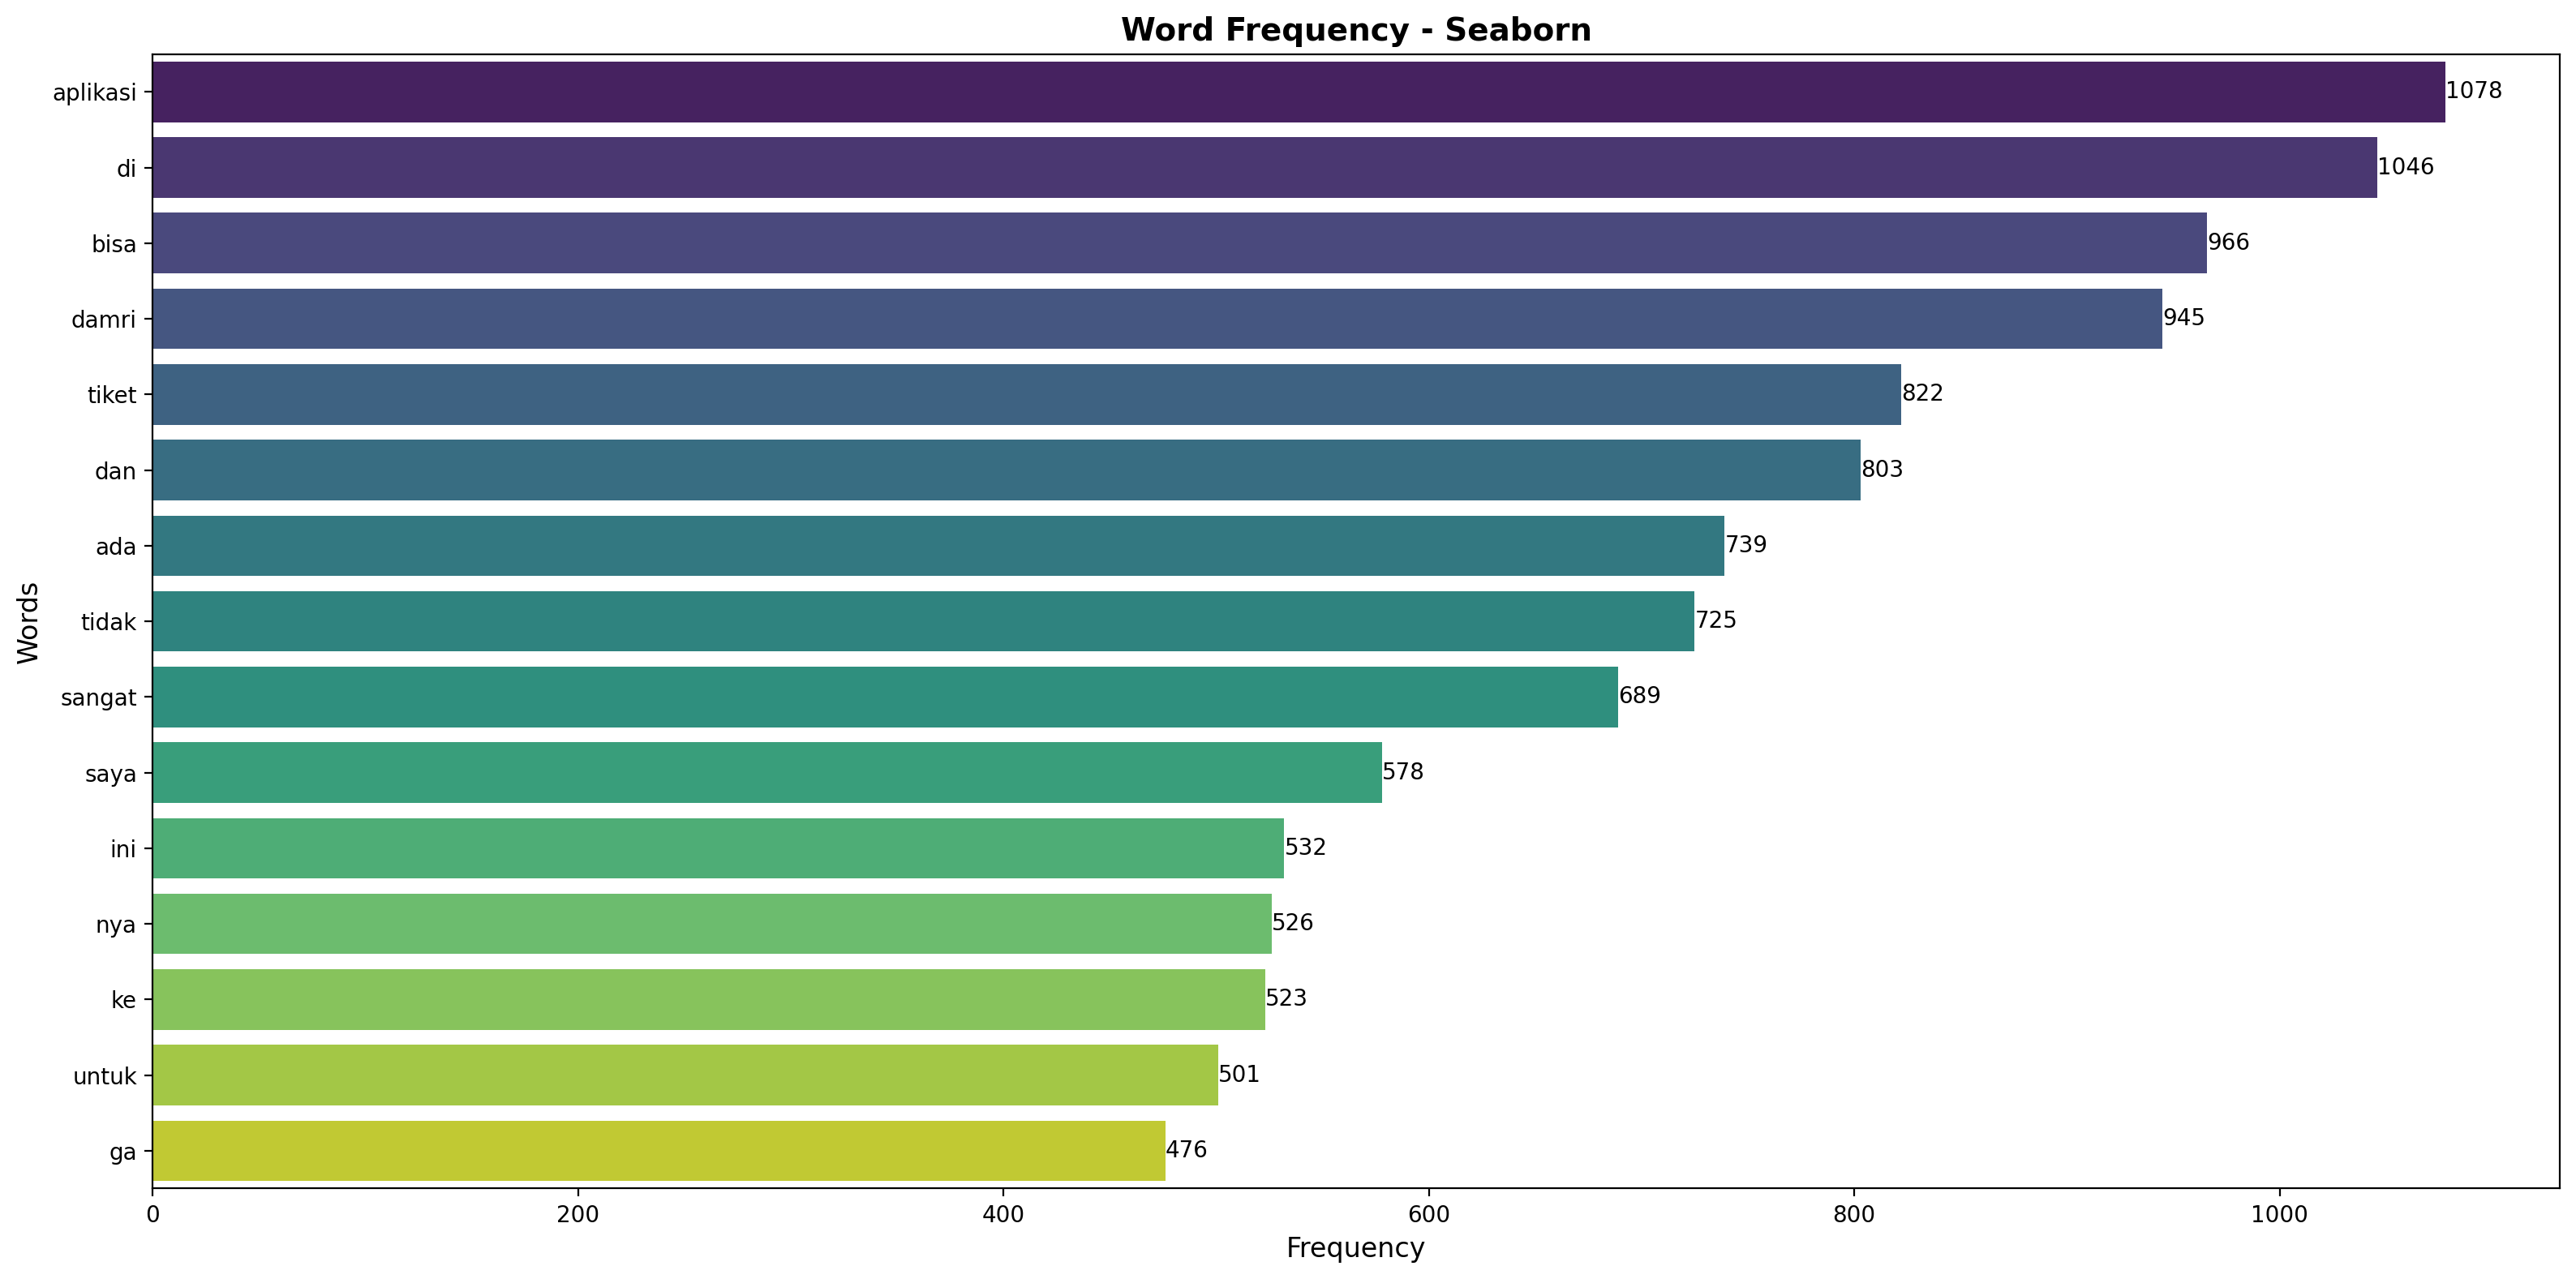

In [145]:

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(16, 8))


# Seaborn horizontal bar chart
sns.barplot(data=df, x='Frequency', y='Word', ax=ax, palette='viridis')
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.set_title('Word Frequency - Seaborn', fontsize=14, fontweight='bold')

# Add frequency values on bars for seaborn plot
for i, v in enumerate(df['Frequency']):
    ax.text(v + 0.1, i, str(v), va='center', fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Stemming

In [146]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [147]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
text = "saya sedang berjalan ke sekolah"
stemmed = stemmer.stem(text)
print("After stemming:", stemmed)

After stemming: saya sedang jalan ke sekolah


In [148]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(stemmer.stem)

### Stopwords Removal

In [149]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [150]:
stop_factory = StopWordRemoverFactory()
stop_remover = stop_factory.create_stop_word_remover()
cleaned = stop_remover.remove(stemmed)
print("After stopword removal:", cleaned)

After stopword removal: sedang jalan sekolah


In [151]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(stop_remover.remove)

### Expand Contraction

In [152]:
contraction_regex_dictionary = {
    "\sn?g?ga?k?\s" : " tidak ",
    "\sba?n?ge?t\s" : " banget "
}

In [153]:
def expand_contractions(text: str, contraction_mapping=contraction_regex_dictionary) -> str:
    for regex, replacement in contraction_mapping.items():
        text = re.sub(regex, replacement, " "+text+" ")
    return text.strip()

In [154]:
df_damri['cleaned_text'] = df_damri['cleaned_text'].apply(expand_contractions)

### Final Tokenization

In [155]:
df_damri['tokenized_preprocessed_text'] = df_damri['cleaned_text'].apply(word_tokenize)

### get preprocessed csv

In [159]:
df_damri = df_damri[['content', 'cleaned_text', 'tokenized_raw_text', 'tokenized_preprocessed_text', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']]

In [160]:
df_damri.to_csv("../data/damri_apps_preprocessed.csv", index=False)